In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
data = pd.read_csv('project/matched_beer_data/ratings.csv')
data.head()

# Split the dataframe into two based on columns containing 'ba' and 'rb'
ba_data = data.loc[:, data.columns.str.startswith('ba')]
rb_data = data.loc[:, data.columns.str.startswith('rb')]



C:\Users\ameli\AppData\Local\Temp\ipykernel_22104\8038234.py:1: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,13,17,18,19,20,22,24,25,26,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('project/matched_beer_data/ratings.csv')


In [3]:
def preprocess_text(text):
    # Tokenize the text
    text = str(text) #we only want to work with strings
    text = text.translate(str.maketrans('', '', string.punctuation)) #removes the punctuation, for better filtering
    tokens = word_tokenize(text.lower())

    # Remove stop words
    custom_stopwords = set(stopwords.words('english')).union({"'s",'s','note','notes','almost','beer','lots','quite','maybe','lot','though', 'aroma','flavor','palate','overall','appearance',"n't",'taste','head','mouthfeel','bottle','glass','little','smell','bit','one','lot','nose','really','much','body','hint','quot','spice','itâ s'})
    filtered_tokens = ' '.join([token for token in tokens if token not in custom_stopwords])
    return filtered_tokens

def plot_wordcloud(text):
    text_single_string = ' '.join(text)
    # Create and generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='viridis').generate(text_single_string)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    


C:\Users\ameli\AppData\Local\Temp\ipykernel_22104\474394777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_data_clean['preprocessed text'] = ba_data_clean['ba.14'].apply(preprocess_text)


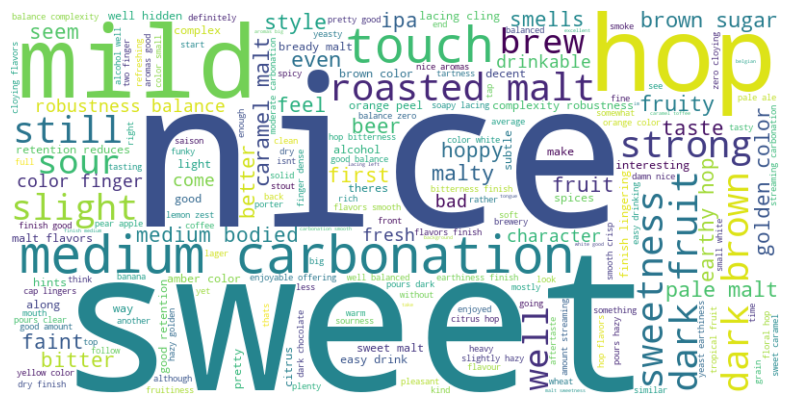

In [4]:

ba_data_clean= ba_data.dropna(subset=['ba.14'])
ba_data_clean['preprocessed text'] = ba_data_clean['ba.14'].apply(preprocess_text)

plot_wordcloud(ba_data_clean['preprocessed text'])


In [5]:
# Initialize a list to hold the beer data
#ici c'est pour toutes les charactéristiques des bières

beer_data = []

#this is used to use all of the data from the beeradvocate file, and

# Open the file and read line by line
with open('project/matched_beer_data/ratings_with_text_ba.txt', 'r', encoding='utf-8') as file:
    beer_info = {}  # Temporary storage for each beer entry
    for line in file:
        # Strip whitespace and check if the line is not empty
        line = line.strip()
        if line:
            # Split on the first occurrence of ': ' and check for valid key-value pairs
            parts = line.split(': ', 1)  # Split into at most 2 parts
            if len(parts) == 2:  # Ensure we have both key and value
                key, value = parts
                beer_info[key] = value  # Store the value in the dictionary
            
                # When we reach the end of a beer entry (next empty line), save the entry
                if key == 'text':  # We assume 'text' is the last field for each beer entry
                    beer_data.append(beer_info)  # Append the entire beer_info dictionary to the list
                    beer_info = {}  # Reset the temporary storage for the next entry

# Create a DataFrame from the collected beer data
df_ba = pd.DataFrame(beer_data)

user_df_ba = pd.read_csv('project/matched_beer_data/users.csv')
user_df_ba = user_df_ba.loc[:, user_df_ba.columns.str.startswith('ba')]
# Set the column names as the first row and remove the first row to be able to set it to the column names and merge correctly 
user_df_ba.columns = user_df_ba.iloc[0]
user_df_ba = user_df_ba[1:]

# Merge the user DataFrame with the existing DataFrame on the 'user_id' column
df_matched_data_ba = pd.merge(df_ba, user_df_ba, on='user_id', how='inner')



In [6]:
df_matched_data_ba = df_matched_data_ba.dropna(subset=['text']) 
df_matched_data_ba['preprocessed text'] = df_matched_data_ba['text'].apply(preprocess_text)


Text(0.5, 1.0, 'Word Cloud of Beer Advocate Reviews')

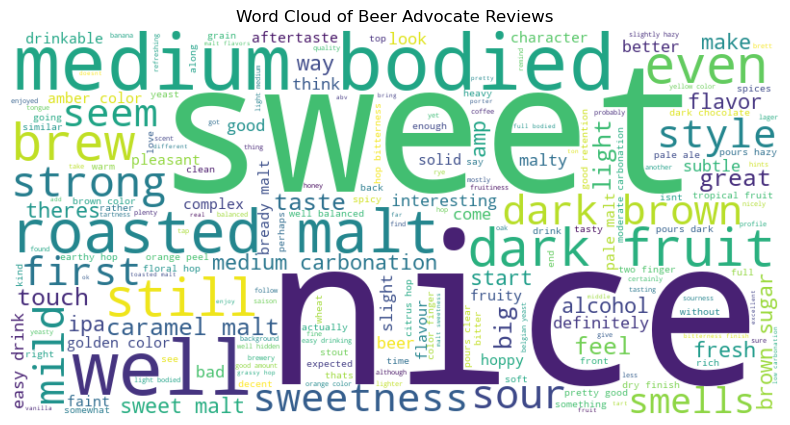

In [7]:
plot_wordcloud(df_matched_data_ba['preprocessed text'].tolist())
plt.title('Word Cloud of Beer Advocate Reviews')

Text(0.5, 1.0, 'Ratebeer wordcloud')

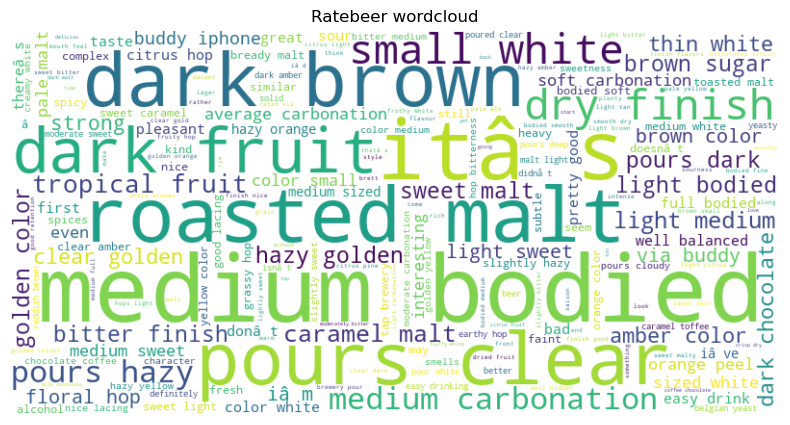

In [8]:
# Initialize a list to hold the beer data
#ici c'est pour toutes les charactéristiques des bières

beer_data = []

#this is used to use all of the data from the beeradvocate file, and

# Open the file and read line by line
with open('project/matched_beer_data/ratings_with_text_rb.txt', 'r', encoding='utf-8') as file:
    beer_info = {}  # Temporary storage for each beer entry
    for line in file:
        # Strip whitespace and check if the line is not empty
        line = line.strip()
        if line:
            # Split on the first occurrence of ': ' and check for valid key-value pairs
            parts = line.split(': ', 1)  # Split into at most 2 parts
            if len(parts) == 2:  # Ensure we have both key and value
                key, value = parts
                beer_info[key] = value  # Store the value in the dictionary
            
                # When we reach the end of a beer entry (next empty line), save the entry
                if key == 'text':  # We assume 'text' is the last field for each beer entry
                    beer_data.append(beer_info)  # Append the entire beer_info dictionary to the list
                    beer_info = {}  # Reset the temporary storage for the next entry

# Create a DataFrame from the collected beer data
df_rb = pd.DataFrame(beer_data)

user_df_rb = pd.read_csv('project/matched_beer_data/users.csv')
user_df_rb = user_df_rb.loc[:, user_df_rb.columns.str.startswith('rb')]
# Set the column names as the first row and remove the first row to be able to set it to the column names and merge correctly 
user_df_rb.columns = user_df_rb.iloc[0]
user_df_rb = user_df_rb[1:]

# Merge the user DataFrame with the existing DataFrame on the 'user_id' column
df_matched_data_rb = pd.merge(df_rb, user_df_rb, on='user_id', how='inner')

df_matched_data_rb = df_matched_data_rb.dropna(subset=['text']) 
df_matched_data_rb['preprocessed text'] = df_matched_data_rb['text'].apply(preprocess_text)

plot_wordcloud(df_matched_data_rb['preprocessed text'].tolist())
plt.title('Ratebeer wordcloud')



Text(0.5, 1.0, 'Romania Reviews')

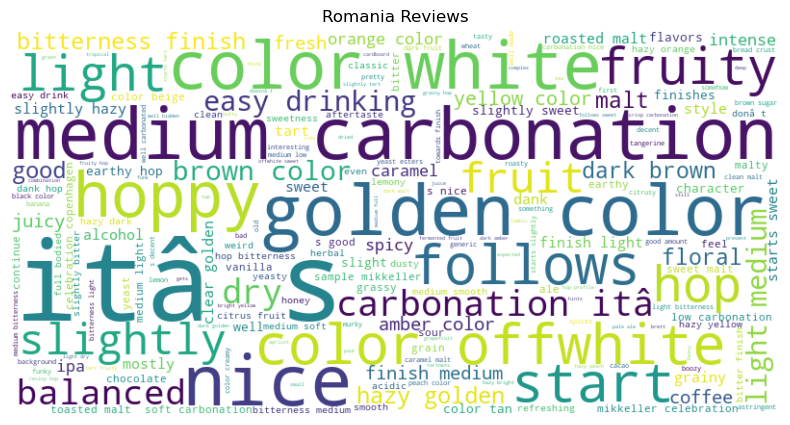

In [9]:



usa_reviews = df_matched_data_rb[df_matched_data_rb['location']=='Romania']
plot_wordcloud(usa_reviews['preprocessed text'].tolist())
plt.title('Romania Reviews')

Text(0.5, 1.0, 'Wordcloud all reviews')

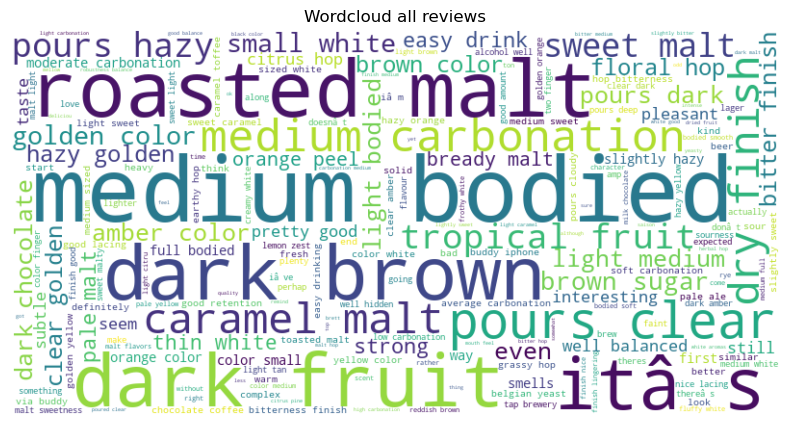

In [11]:
#
df_combined_reviews = pd.concat([df_matched_data_rb, df_matched_data_ba], ignore_index=True)
plot_wordcloud(df_combined_reviews['preprocessed text'].tolist())
plt.title('Wordcloud all reviews')

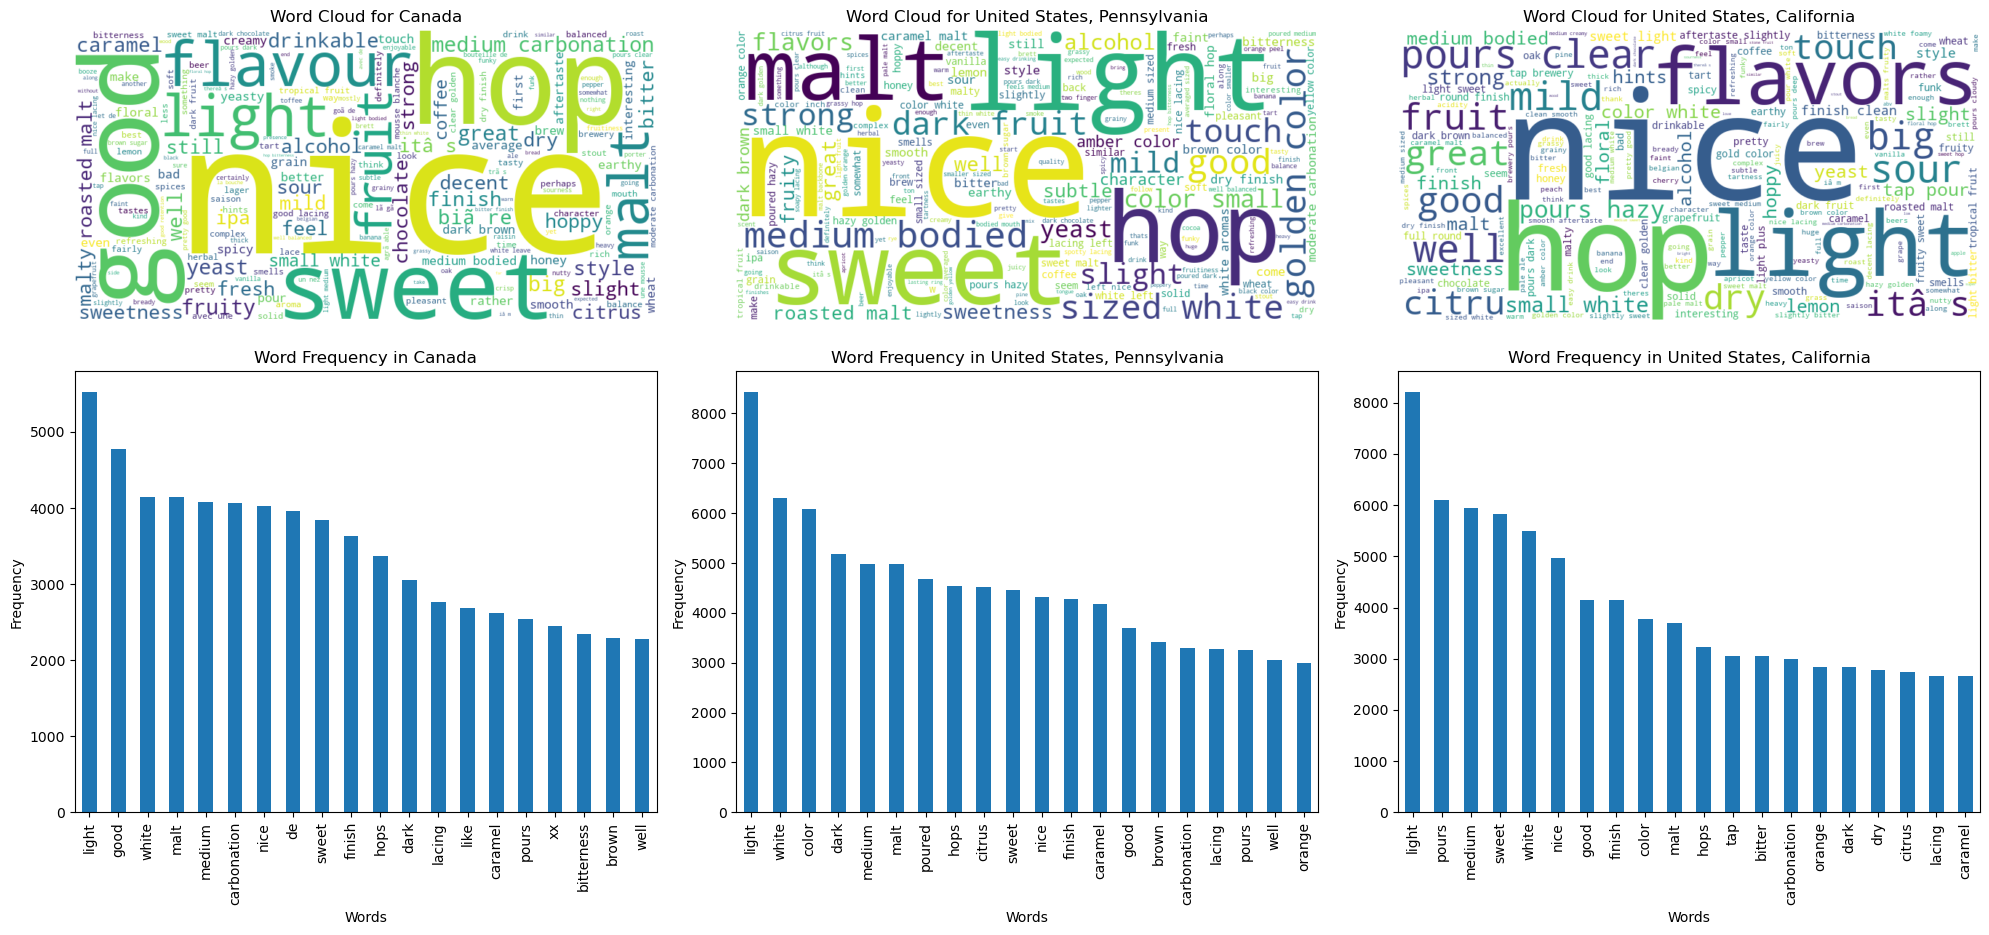

In [ ]:
# Find the top 3 countries with the most users and plot the most words used in the reviews
top_countries = df_combined_reviews['location'].value_counts().head(3).index.tolist()

# Filter the data for the top 3 countries
top_countries_data = df_combined_reviews[df_combined_reviews['location'].isin(top_countries)]

# Plot word clouds for each of the top 3 countries
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, country in enumerate(top_countries):
    country_data = top_countries_data[top_countries_data['location'] == country]
    country_text = ' '.join(country_data['preprocessed text'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(country_text)
    
    # Plot word cloud
    axes[0, i].imshow(wordcloud, interpolation='bilinear')
    axes[0, i].set_title(f'Word Cloud for {country}')
    axes[0, i].axis('off')
    
    # Plot histogram
    words = country_text.split()
    word_freq = pd.Series(words).value_counts().head(20)
    word_freq.plot(kind='bar', ax=axes[1, i])
    axes[1, i].set_title(f'Word Frequency in {country}')
    axes[1, i].set_xlabel('Words')
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()